In [39]:
import pandas as pd
import numpy as np

# Cargar el dataset
data = pd.read_csv('E:/Bootcamp/examendojo/diabetes/diabetes.csv')

# Ver las primeras filas del dataset
data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


2. Limpieza de Datos
a. Identificación y eliminación de valores duplicados

In [40]:
# Verificar duplicados
duplicates = data.duplicated().sum()

# Eliminar duplicados
data = data.drop_duplicates()


 Verificación y ajuste de tipos de datos
Comprobamos que los tipos de datos sean correctos, por ejemplo, que las variables como Age, BMI, BloodPressure, etc., sean de tipo numérico.

In [41]:
# Verificar tipos de datos
data.dtypes

# En caso de que haya columnas que deban ser convertidas, podemos hacerlo:
# Ejemplo: data['Age'] = data['Age'].astype(int)


Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

 Corrección de inconsistencias en valores categóricos
En este caso, la columna Outcome es categórica (0 o 1), pero si hay valores que puedan estar mal escritos, se deben corregir.

In [42]:
# Revisar valores únicos en 'Outcome'
data['Outcome'].value_counts()

# Si hay inconsistencias, corregirlas
# Por ejemplo, si existiera un valor '0 ' con un espacio, lo corregiríamos así:
# data['Outcome'] = data['Outcome'].str.strip()


Outcome
0    500
1    268
Name: count, dtype: int64

d. Manejo de valores faltantes
Si alguna columna tiene valores faltantes, se pueden imputar utilizando la mediana, la media o la moda según corresponda.

In [43]:
# Comprobar si hay valores faltantes
missing_values = data.isnull().sum()

# Imputar valores faltantes con la mediana (para valores numéricos)
data.fillna(data.median(), inplace=True)


3. Exploración de Datos
a. Visualizaciones univariadas

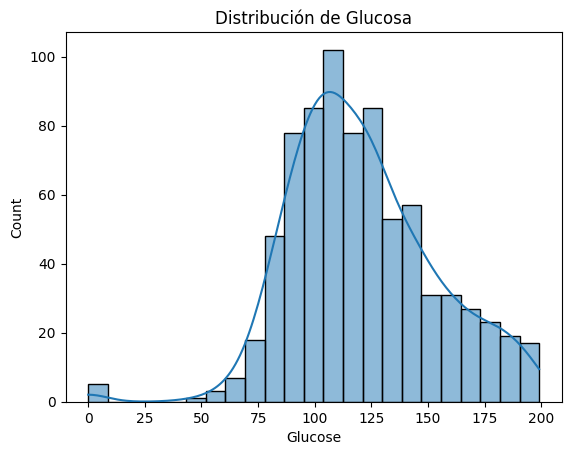

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma para la variable 'Glucose'
sns.histplot(data['Glucose'], kde=True)
plt.title('Distribución de Glucosa')
plt.show()



 Gráficos multivariados

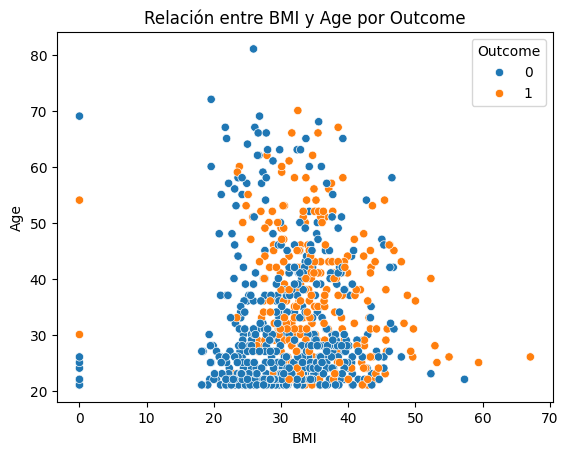

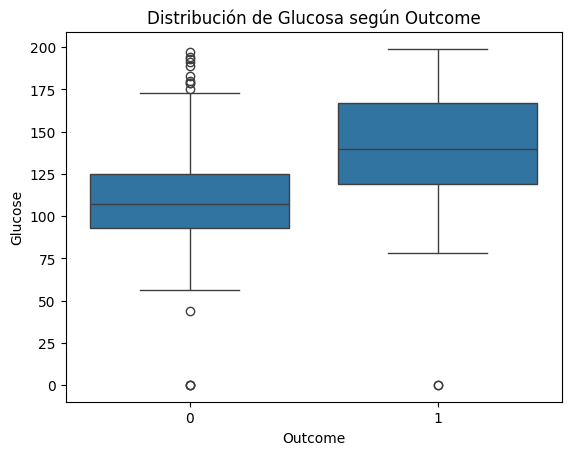

In [45]:
# Diagrama de dispersión entre 'BMI' y 'Age'
sns.scatterplot(data=data, x='BMI', y='Age', hue='Outcome')
plt.title('Relación entre BMI y Age por Outcome')
plt.show()

# Gráfico de caja para ver la distribución de 'Glucose' según el 'Outcome'
sns.boxplot(x='Outcome', y='Glucose', data=data)
plt.title('Distribución de Glucosa según Outcome')
plt.show()


 Estadísticas descriptivas

In [46]:
# Estadísticas descriptivas
data.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


4. Implementación de Modelos de Clasificación
a. Preparación de los datos

In [47]:
from sklearn.model_selection import train_test_split

# Definir X y y
X = data.drop(columns=['Outcome'])
y = data['Outcome']

# Dividir en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


 Entrenamiento de un modelo Random Forest
Usamos RandomForestClassifier de sklearn para crear un modelo.

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

# Entrenar el modelo
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predicciones
y_pred_rf = rf_model.predict(X_test)

# Evaluar el modelo
print("Accuracy (Random Forest):", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC (Random Forest):", roc_auc_score(y_test, y_pred_rf))


Accuracy (Random Forest): 0.7207792207792207
              precision    recall  f1-score   support

           0       0.79      0.78      0.78        99
           1       0.61      0.62      0.61        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154

ROC-AUC (Random Forest): 0.697979797979798


Entrenamiento de un modelo XGBoost

In [49]:
import xgboost as xgb

# Entrenar el modelo
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

# Predicciones
y_pred_xgb = xgb_model.predict(X_test)

# Evaluar el modelo
print("Accuracy (XGBoost):", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))
print("ROC-AUC (XGBoost):", roc_auc_score(y_test, y_pred_xgb))


Accuracy (XGBoost): 0.7077922077922078
              precision    recall  f1-score   support

           0       0.79      0.74      0.76        99
           1       0.58      0.65      0.62        55

    accuracy                           0.71       154
   macro avg       0.69      0.70      0.69       154
weighted avg       0.72      0.71      0.71       154

ROC-AUC (XGBoost): 0.6959595959595959


5. Evaluación y Comparación de Modelos
Una vez entrenados ambos modelos, se comparan utilizando las métricas de precisión

In [50]:
# Comparar resultados
print("Random Forest - Accuracy:", accuracy_score(y_test, y_pred_rf))
print("XGBoost - Accuracy:", accuracy_score(y_test, y_pred_xgb))


Random Forest - Accuracy: 0.7207792207792207
XGBoost - Accuracy: 0.7077922077922078


Si simplemente buscamos la precision acerca de quienes pueden tener diabtes, Random Forest es un poco mas preciso que XGBoost en este caso, pero la elección del modelo también depende de otros factores como el tiempo de computación y la naturaleza de los datos, pero para el objetivo de predecir si un paciente tiene diabetes o no, Random Forest es la mejor opcion ya que nos da un resultado mas preciso.
